In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



C:\Users\Arnold\AppData\Local\Temp\ipykernel_20188\3029709031.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Sentiment Analysis and Sentiment Modeling for Amazon Reviews

In [4]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Arnold\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Arnold\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Arnold\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 200)

## 1. Text Preprocessing

In [8]:
df = pd.read_csv(r"C:\Users\Arnold\Videos\mini project\Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [10]:
df = df[:20000]    # Because of memory problem...

In [11]:
###############################
# Normalizing Case Folding
###############################

df['Text'] = df['Text'].str.lower()

In [12]:
###############################
# Punctuations
###############################

df['Text'] = df['Text'].str.replace('[^\w\s]', '')

In [13]:
###############################
# Numbers
###############################

df['Text'] = df['Text'].str.replace('\d', '')

In [14]:
###############################
# Stopwords
###############################
import nltk
nltk.download('stopwords')

sw = stopwords.words('english')

df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arnold\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df['Text']

0        bought several vitality canned dog food produc...
1        product arrived labeled jumbo salted peanuts.....
2        confection around centuries. light, pillowy ci...
3        looking secret ingredient robitussin believe f...
4        great taffy great price. wide assortment yummy...
                               ...                        
19995    deep river salt & vinegar chips thick crunchy....
19996    skeptical buying brand chips never tasted befo...
19997    turn name brands there, give try. although mau...
19998    expecting "serious flavor" advertised bag.. co...
19999    purchased salt vinegar chips pleased. right am...
Name: Text, Length: 20000, dtype: object

In [16]:
###############################
# Rarewords
###############################

temp_df = pd.Series(' '.join(df['Text']).split()).value_counts()

temp_df

/><br          8878
like           8475
good           5249
one            5069
coffee         4721
               ... 
ta-ta.            1
grey..hot".       1
jlp               1
brisker.          1
depressor         1
Name: count, Length: 71225, dtype: int64

In [17]:
drops = temp_df[temp_df <= 1]

drops

jam!).              1
wise)               1
ship...aaaa+++++    1
"picky              1
"chicory            1
                   ..
ta-ta.              1
grey..hot".         1
jlp                 1
brisker.            1
depressor           1
Name: count, Length: 41669, dtype: int64

In [18]:
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

In [19]:
###############################
# Lemmatization
###############################

nltk.download('wordnet')
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['Text'].head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arnold\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanut ac...
2    confection around light, citrus gelatin nut - ...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
5    got wild hair taffy ordered five pound bag. ta...
6    taffy great flavor soft chewy. candy individua...
7    taffy good. soft chewy. flavor amazing. would ...
8    right i'm mostly sprouting cat eat grass. love...
9    healthy dog food. good digestion. also good sm...
Name: Text, dtype: object

## 2. Text Visualization

In [20]:
tf = df["Text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [21]:
tf.columns = ["words", "tf"]

tf.sort_values("tf", ascending=False)

,words,tf
168,/><br,8878.00
11,like,8856.00
190,taste,5868.00
206,one,5485.00
15,good,5291.00
...,...,...
18635,rage,2.00
18636,missouri,2.00
18642,"non-acidic,",2.00
18645,atlanta,2.00


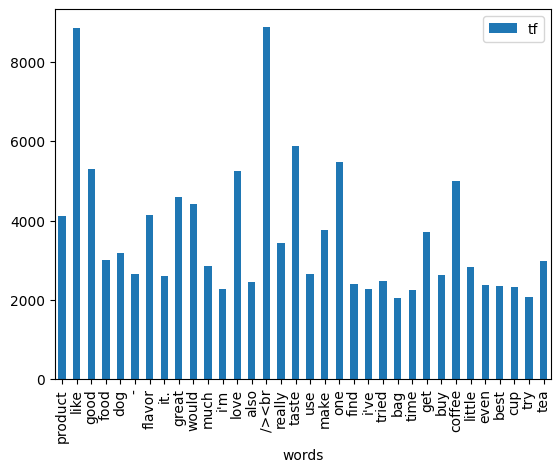

In [22]:
###############################
# Barplot
###############################

tf[tf["tf"] > 2000].plot.bar(x="words", y="tf")
plt.show()

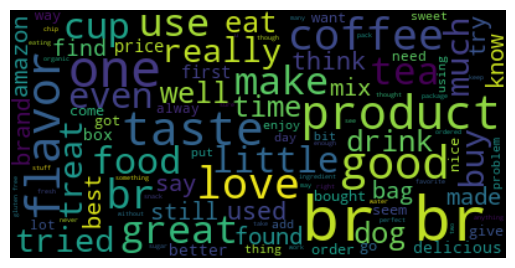

In [23]:
###############################
# Wordcloud
###############################

text = " ".join(i for i in df["Text"])


wordcloud = WordCloud(max_font_size=50,
max_words=100,
background_color="black").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## 3. Sentiment Analysis

In [24]:
sia = SentimentIntensityAnalyzer()

In [25]:
df["Text"][0:10].apply(lambda x: sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp...
1    {'neg': 0.142, 'neu': 0.737, 'pos': 0.121, 'co...
2    {'neg': 0.049, 'neu': 0.584, 'pos': 0.367, 'co...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...
5    {'neg': 0.047, 'neu': 0.69, 'pos': 0.263, 'com...
6    {'neg': 0.0, 'neu': 0.515, 'pos': 0.485, 'comp...
7    {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou...
8    {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
9    {'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp...
Name: Text, dtype: object

In [26]:
df["Text"][0:10].apply(lambda x: sia.polarity_scores(x)["compound"])

0    0.94
1   -0.10
2    0.93
3    0.00
4    0.95
5    0.87
6    0.95
7    0.90
8    0.64
9    0.82
Name: Text, dtype: float64

In [27]:
df["Text"][0:10].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

0    pos
1    neg
2    pos
3    neg
4    pos
5    pos
6    pos
7    pos
8    pos
9    pos
Name: Text, dtype: object

In [28]:
df["Sentiment_Label"] = df["Text"].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")

In [29]:
df["Sentiment_Label"].value_counts()

Sentiment_Label
pos    18252
neg     1748
Name: count, dtype: int64

In [30]:
df.groupby("Sentiment_Label")["Score"].mean()

Sentiment_Label
neg   2.64
pos   4.31
Name: Score, dtype: float64

In [31]:
# Test-Train
train_x, test_x, train_y, test_y = train_test_split(df["Text"],
                                                    df["Sentiment_Label"],
                                                    random_state=42)

In [32]:
# TF-IDF Word Level
tf_idf_word_vectorizer = TfidfVectorizer().fit(train_x)
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

## 4. Sentiment Modelling

#### Logistic Regression

In [33]:
###############################
# Logistic Regression
###############################

log_model = LogisticRegression().fit(x_train_tf_idf_word, train_y)

In [34]:
y_pred = log_model.predict(x_test_tf_idf_word)

print(classification_report(y_pred, test_y))

              precision    recall  f1-score   support

         neg       0.09      0.88      0.16        43
         pos       1.00      0.92      0.96      4957

    accuracy                           0.92      5000
   macro avg       0.54      0.90      0.56      5000
weighted avg       0.99      0.92      0.95      5000



In [35]:
cross_val_score(log_model, x_test_tf_idf_word, test_y, cv=5).mean()

0.9116

In [36]:
random_review = pd.Series(df["Text"].sample(1).values)
random_review

0    favorite "assorted" candy ever! wish they'd re...
dtype: object

In [37]:
new_review = CountVectorizer().fit(train_x).transform(random_review)
pred = log_model.predict(new_review)
print(f'Review:  {random_review[0]} \n Prediction: {pred}')

Review:  favorite "assorted" candy ever! wish they'd release white dark bag treat look forward year. local store around halloween usually buy entire stock. love crunch flavor chocolate make picking favorite difficult. (which usually mean eat three time i'm glad see amazon stock case can't find unfortunately, though, shipping run risk melting, even alas, chance would still worth taking order get year. :) 
 Prediction: ['pos']


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a trained logistic regression model named log_model
# Assuming you have a list train_x containing the training text data

# Let the user input a new review
new_review_text = input("Enter a review: ")

# Vectorize the new review using the same CountVectorizer used during training
new_review_vector = CountVectorizer().fit(train_x).transform([new_review_text])

# Predict the sentiment of the new review
prediction = log_model.predict(new_review_vector)

# Print the review and the predicted sentiment
print(f'Review:  {new_review_text}\nPrediction: {prediction}')



Review:  the food is bad
Prediction: ['neg']


#### Random Forests

In [39]:
###############################
# Random Forests
###############################

rf_model = RandomForestClassifier().fit(x_train_tf_idf_word, train_y)
cross_val_score(rf_model, x_test_tf_idf_word, test_y, cv=5, n_jobs=-1).mean()

0.9122

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a trained logistic regression model named log_model
# Assuming you have a list train_x containing the training text data

# Let the user input a new review
new_review_text = input("Enter a review: ")

# Vectorize the new review using the same CountVectorizer used during training
new_review_vector = CountVectorizer().fit(train_x).transform([new_review_text])

# Predict the sentiment of the new review
prediction = rf_model.predict(new_review_vector)

# Print the review and the predicted sentiment
print(f'Review:  {new_review_text}\nPrediction: {prediction}')



Review:  it is good
Prediction: ['pos']


In [53]:
pred1=rf_model.predict(x_test_tf_idf_word)

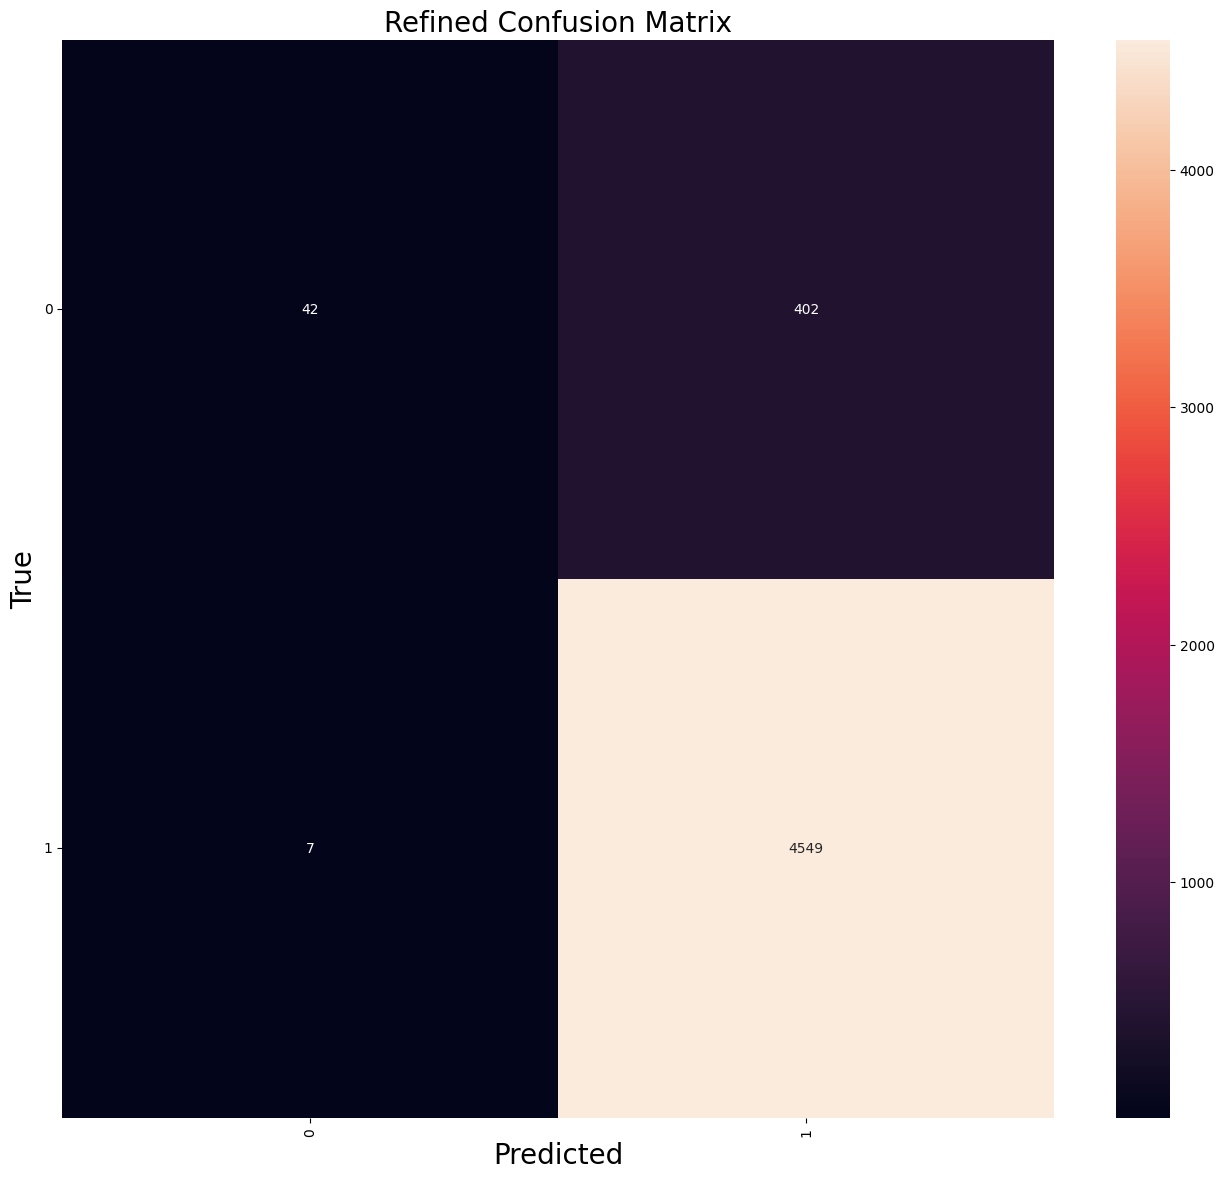

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_y, pred1)

## Get Class Labels
# class_names = list(classes.values())

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
# ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
# ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

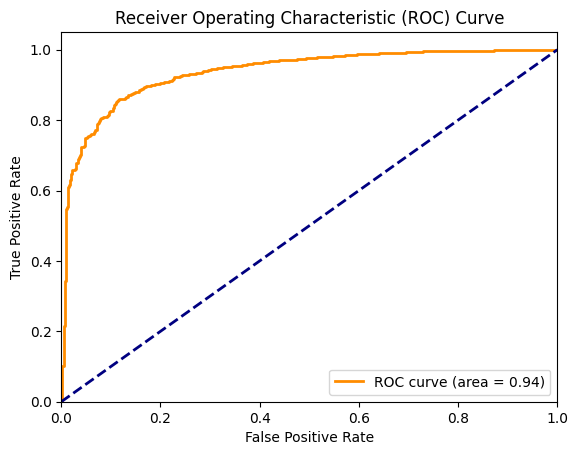

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have your trained logistic regression model (log_model) and your test set features (x_test_tf_idf_word)
# Use the model to predict probabilities for the test set
predicted_probs = log_model.predict_proba(x_test_tf_idf_word)[:, 1]

# Assuming you have your actual labels for the test set (test_y)
actual_labels = test_y
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
actual_labels_encoded = label_encoder.fit_transform(actual_labels)


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(actual_labels_encoded, predicted_probs)
roc_auc = roc_auc_score(actual_labels_encoded, predicted_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


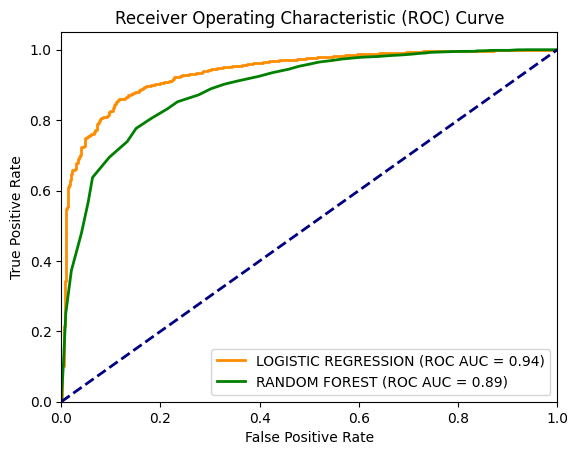

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have your trained logistic regression model (log_model) and your test set features (x_test_tf_idf_word) for both models
# Use the models to predict probabilities for the test set
predicted_probs_model1 = log_model.predict_proba(x_test_tf_idf_word)[:, 1]  # Predicted probabilities for model 1
predicted_probs_model2 = rf_model.predict_proba(x_test_tf_idf_word)[:, 1]   # Predicted probabilities for model 2

# Assuming you have your actual labels for the test set (test_y)
actual_labels = test_y
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
actual_labels_encoded = label_encoder.fit_transform(actual_labels)

# Calculate ROC curve and AUC for both models
fpr_model1, tpr_model1, thresholds_model1 = roc_curve(actual_labels_encoded, predicted_probs_model1)
roc_auc_model1 = roc_auc_score(actual_labels_encoded, predicted_probs_model1)

fpr_model2, tpr_model2, thresholds_model2 = roc_curve(actual_labels_encoded, predicted_probs_model2)
roc_auc_model2 = roc_auc_score(actual_labels_encoded, predicted_probs_model2)

# Plot ROC curves for both models
plt.figure()
plt.plot(fpr_model1, tpr_model1, color='darkorange', lw=2, label='LOGISTIC REGRESSION (ROC AUC = %0.2f)' % roc_auc_model1)
plt.plot(fpr_model2, tpr_model2, color='green', lw=2, label='RANDOM FOREST (ROC AUC = %0.2f)' % roc_auc_model2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
